In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Implementing Multi-Dimensional Gradient Descent

## A More Complex Example: The Rosenbrock Function

The Rosenbrock function is a classic optimization problem, known for its narrow, curved valley. It is defined as:
$$ f(x, y) = (a - x)^2 + b(y - x^2)^2 $$
A common choice for the constants is $a=1$ and $b=100$. The minimum is at $(a, a^2)$, which is $(1, 1)$ for our choice of constants.

Let's define and visualize this function.

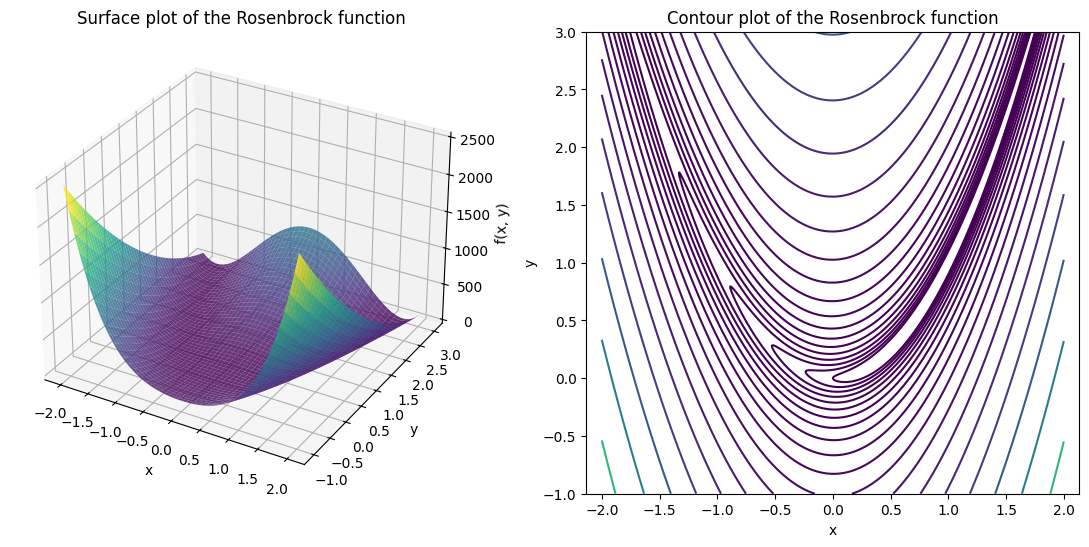

In [ ]:
# Define the Rosenbrock function

# Create a grid for the Rosenbrock function

# Plot the Rosenbrock function


## Gradient of the Rosenbrock Function

The partial derivatives of the Rosenbrock function are:
$$ \frac{\partial f}{\partial x} = -2(a - x) - 4bx(y - x^2) $$
$$ \frac{\partial f}{\partial y} = 2b(y - x^2) $$
So the gradient is:
$$ \nabla f(x, y) = \left( -2(a - x) - 4bx(y - x^2), 2b(y - x^2) \right) $$

In [ ]:
# Define the gradient of the Rosenbrock function


## Gradient Descent on the Rosenbrock Function

Now, let's apply gradient descent to the Rosenbrock function. The narrow valley makes it tricky, and the choice of learning rate is even more important. A small learning rate is needed to navigate the curve of the valley without overshooting.

In [ ]:
# Run gradient descent on the Rosenbrock function


## Visualizing the Descent on the Rosenbrock Function

Let's visualize the path of the gradient descent on the contour plot of the Rosenbrock function.

In [8]:

# Plot the path on the contour plot
